In [25]:
import os
import json
import time
import itertools
import datetime
import cartopy
# Third-party Imports
import numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as nd
import matplotlib.pyplot as pyplot

import csep

In [9]:
from csep.utils import datasets, time_utils, comcat, plots
from csep.core import regions, catalog_evaluations

# set start and end date
start_time = time_utils.strptime_to_utc_datetime('2010-04-08 00:00:00.0')
end_time = time_utils.strptime_to_utc_datetime('2010-04-09 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)
min_mw = 3.95 # minimum magnitude
max_mw = 8.95 # max magnitude after which is just one bin
dmw = 0.1 # bin width

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = regions.magnitude_bins(min_mw, max_mw, dmw)
region = regions.california_relm_region()

# Bind region information to the forecast 
space_magnitude_region = regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information 
print(catalog)

#######################################
# CAGALOGUE SHOULD CONTAIN 10 EVENTS ##
#######################################

Fetched ComCat catalog in 0.10268759727478027 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2010-04-08 00:01:29.990000+00:00
End Date: 2010-04-09 23:28:41.940000+00:00
Min Latitude: 31.7856667 and Max Latitude: 40.593
Min Longitude: -124.7611667 and Max Longitude: -114.938
Min Magnitude: 2.5
Found 316 events in the ComCat catalog.

        Name: None

        Start Date: 2010-04-08 00:25:37.920000+00:00
        End Date: 2010-04-09 23:05:42+00:00

        Latitude: (32.054, 32.6855)
        Longitude: (-115.7635, -115.0835)

        Min Mw: 3.95
        Max Mw: 5.29

        Event Count: 10
        


In [37]:
#load forecast
forecast = csep.load_catalog_forecast('u3_fore_2010_04_08.bin',
                                      start_time = start_time,
                                      end_time = end_time,
                                      type='ucerf3',
                                      region = space_magnitude_region,
                                      filter_spatial = True,
                                      apply_filters = True,
                                      filters = 'magnitude >= 3.95')

In [38]:
evt_counts = forecast.get_event_counts()

Processed 1 catalogs in 0.00 seconds
Processed 2 catalogs in 0.00 seconds
Processed 3 catalogs in 0.00 seconds
Processed 4 catalogs in 0.00 seconds
Processed 5 catalogs in 0.01 seconds
Processed 6 catalogs in 0.01 seconds
Processed 7 catalogs in 0.01 seconds
Processed 8 catalogs in 0.01 seconds
Processed 9 catalogs in 0.01 seconds
Processed 10 catalogs in 0.01 seconds
Processed 20 catalogs in 0.01 seconds
Processed 30 catalogs in 0.02 seconds
Processed 40 catalogs in 0.02 seconds
Processed 50 catalogs in 0.02 seconds
Processed 60 catalogs in 0.03 seconds
Processed 70 catalogs in 0.03 seconds
Processed 80 catalogs in 0.03 seconds
Processed 90 catalogs in 0.04 seconds
Processed 100 catalogs in 0.04 seconds
Processed 200 catalogs in 0.06 seconds
Processed 300 catalogs in 0.08 seconds
Processed 400 catalogs in 0.10 seconds
Processed 500 catalogs in 0.12 seconds
Processed 600 catalogs in 0.13 seconds
Processed 700 catalogs in 0.15 seconds
Processed 800 catalogs in 0.17 seconds
Processed 900

In [22]:
##############################
# Thia sum should be 420734 ##
##############################
np.sum(evt_counts)

420734

In [36]:
# compute N-test
number_test_result = catalog_evaluations.number_test(forecast, catalog)

Processed 1 catalogs in 0.0 seconds
Processed 2 catalogs in 0.0009999275207519531 seconds
Processed 3 catalogs in 0.0009999275207519531 seconds
Processed 4 catalogs in 0.0019996166229248047 seconds
Processed 5 catalogs in 0.002999544143676758 seconds
Processed 6 catalogs in 0.002999544143676758 seconds
Processed 7 catalogs in 0.0039997100830078125 seconds
Processed 8 catalogs in 0.0039997100830078125 seconds
Processed 9 catalogs in 0.00500178337097168 seconds
Processed 10 catalogs in 0.00500178337097168 seconds
Processed 20 catalogs in 0.006002664566040039 seconds
Processed 30 catalogs in 0.00700068473815918 seconds
Processed 40 catalogs in 0.00700068473815918 seconds
Processed 50 catalogs in 0.007999897003173828 seconds
Processed 60 catalogs in 0.007999897003173828 seconds
Processed 70 catalogs in 0.007999897003173828 seconds
Processed 80 catalogs in 0.007999897003173828 seconds
Processed 90 catalogs in 0.009000778198242188 seconds
Processed 100 catalogs in 0.009000778198242188 second

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


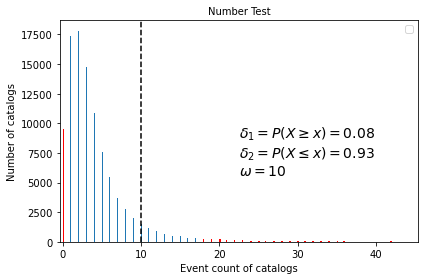

In [35]:
##################################################################
## results should be delta_1 = 0.08, delta_2 = 0.93, omega = 10 ##
################################################################## 
ax = number_test_result.plot()

In [23]:
#calculate expected rates per space-magnitude bin
expected_rates = forecast.get_expected_rates(verbose=True)

Processed 1 catalogs in 0.001 seconds
Processed 2 catalogs in 0.003 seconds
Processed 3 catalogs in 0.005 seconds
Processed 4 catalogs in 0.007 seconds
Processed 5 catalogs in 0.009 seconds
Processed 6 catalogs in 0.011 seconds
Processed 7 catalogs in 0.013 seconds
Processed 8 catalogs in 0.015 seconds
Processed 9 catalogs in 0.017 seconds
Processed 10 catalogs in 0.018 seconds
Processed 20 catalogs in 0.031 seconds
Processed 30 catalogs in 0.045 seconds
Processed 40 catalogs in 0.059 seconds
Processed 50 catalogs in 0.073 seconds
Processed 60 catalogs in 0.087 seconds
Processed 70 catalogs in 0.101 seconds
Processed 80 catalogs in 0.114 seconds
Processed 90 catalogs in 0.128 seconds
Processed 100 catalogs in 0.142 seconds
Processed 200 catalogs in 0.263 seconds
Processed 300 catalogs in 0.382 seconds
Processed 400 catalogs in 0.503 seconds
Processed 500 catalogs in 0.631 seconds
Processed 600 catalogs in 0.751 seconds
Processed 700 catalogs in 0.878 seconds
Processed 800 catalogs in 1

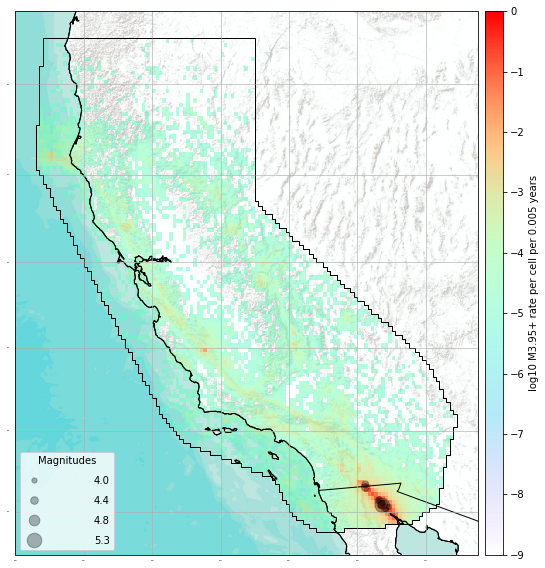

In [29]:
args_forecast = {'title': 'Landers aftershock forecast',
                 'grid_labels': True,
                 'borders': True,
                 'feature_lw': 0.5,
                 'basemap': 'ESRI_imagery',
                 'cmap': 'rainbow',
                 'alpha_exp': 0.9,
                 'projection': cartopy.crs.Mercator(),
                 'clim':[-9, 0]}
args_catalog = {'basemap': 'ESRI_terrain',
                'markercolor': 'black',
                'markersize': 4}
ax_1 = expected_rates.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)
#########################################################
# Image only has observations in the right side corner ##
#########################################################